In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
aapl = pd.read_csv("/Users/pratyush/Python/Python for Finance and Algorithmic Trading/Python-Finance-QuantConnect (1)/06-Financial-Concepts-with-Python/apple_2010.csv",index_col='Date',parse_dates=True)
amzn = pd.read_csv("/Users/pratyush/Python/Python for Finance and Algorithmic Trading/Python-Finance-QuantConnect (1)/06-Financial-Concepts-with-Python/amazon_2010.csv",index_col='Date',parse_dates=True)
ge = pd.read_csv("/Users/pratyush/Python/Python for Finance and Algorithmic Trading/Python-Finance-QuantConnect (1)/06-Financial-Concepts-with-Python/GE_2010.csv",index_col='Date',parse_dates=True)
vix = pd.read_csv("/Users/pratyush/Python/Python for Finance and Algorithmic Trading/Python-Finance-QuantConnect (1)/06-Financial-Concepts-with-Python/VIX_2010.csv",index_col='Date',parse_dates=True)
sp500 = pd.read_csv("/Users/pratyush/Python/Python for Finance and Algorithmic Trading/Python-Finance-QuantConnect (1)/06-Financial-Concepts-with-Python/sp500_2010.csv",index_col='Date',parse_dates=True)

In [3]:
def compute_cumulative_return(df, get_absolute = True):
    
    initial_price = df['Adj Close'].iloc[0]
    final_price = df['Adj Close'].iloc[-1]
    
    #Absolute ==> $ Amount Gain
    if get_absolute:
        return final_price - initial_price
    
    #Normalized ==> % Gain
    else:
        return 100 * (final_price - initial_price) / initial_price

In [4]:
compute_cumulative_return(aapl)

147.8379945755005

In [5]:
compute_cumulative_return(aapl, get_absolute = False)

2287.802548057404

In [6]:
#Function to create a new column in the dataframe that calculates cumulative gains in absolute terms

def create_cumulative_abs(df):
    df['Cumulative Absolute'] = df['Adj Close'] - df['Adj Close'].iloc[0]
    
    return df

In [7]:
aapl = create_cumulative_abs(aapl)
amzn = create_cumulative_abs(amzn)
ge = create_cumulative_abs(ge)
sp500 = create_cumulative_abs(sp500)

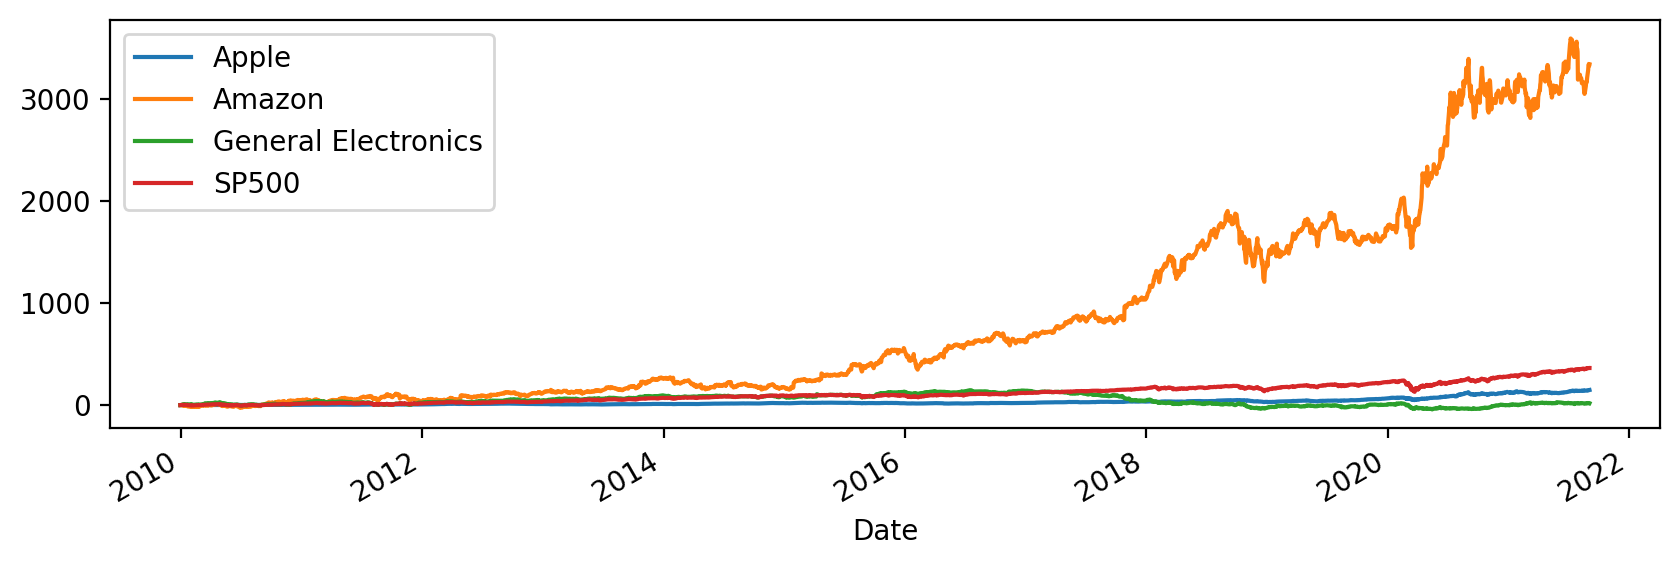

In [8]:
plt.figure(figsize = (10,3), dpi = 200)

aapl['Cumulative Absolute'].plot(label = 'Apple')
amzn['Cumulative Absolute'].plot(label = 'Amazon')
ge['Cumulative Absolute'].plot(label = 'General Electronics')
sp500['Cumulative Absolute'].plot(label = 'SP500')
plt.legend()

In [9]:
#Create a function to calculate cumulative percent gain

def calculate_cumulative_percent(df):
    df['Percent Change'] = 100 * (df['Adj Close'] - df['Adj Close'].iloc[0]) / df['Adj Close'].iloc[0]
    
    return df

In [10]:
aapl = calculate_cumulative_percent(aapl)
amzn = calculate_cumulative_percent(amzn)
ge = calculate_cumulative_percent(ge)
sp500 = calculate_cumulative_percent(sp500)

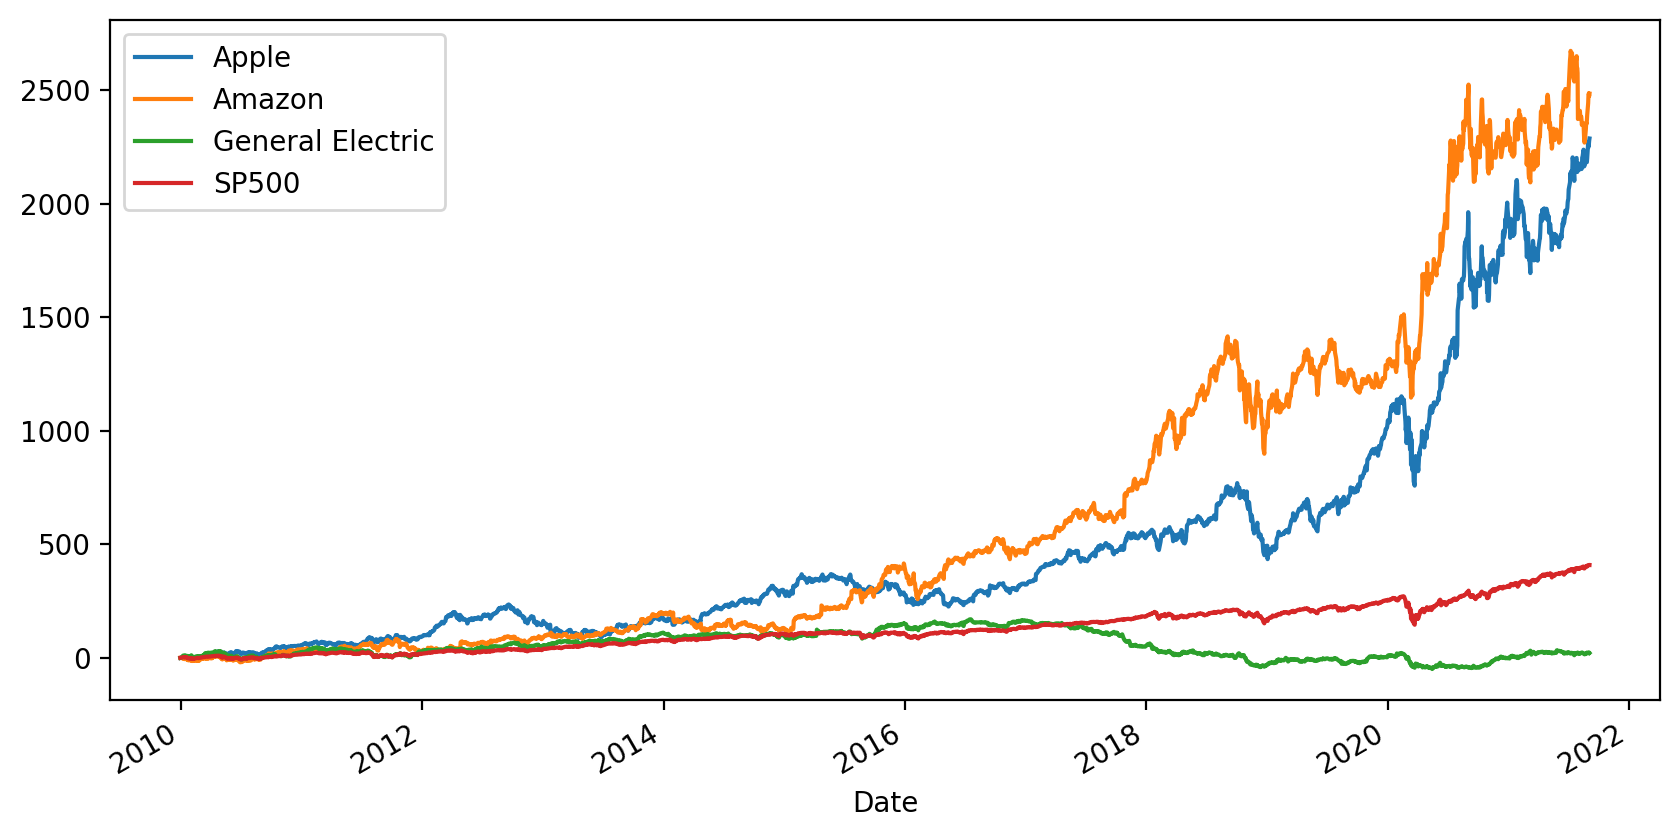

In [11]:
plt.figure(figsize = (10,5), dpi = 200)

aapl['Percent Change'].plot(label = 'Apple')
amzn['Percent Change'].plot(label = 'Amazon')
ge['Percent Change'].plot(label = 'General Electric')
sp500['Percent Change'].plot(label = 'SP500')
plt.legend()

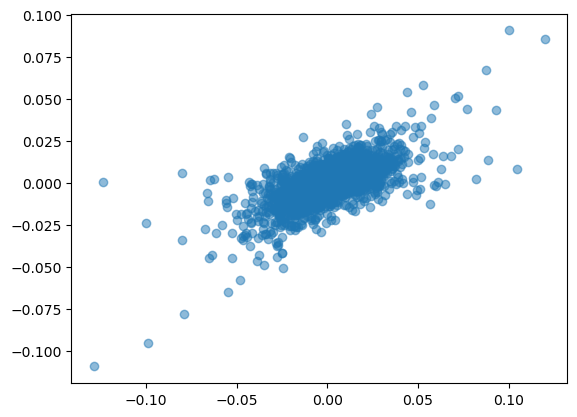

In [12]:
#Now we can create a scatterplot to examine whether the stocks show a pattern that relates to the market
    #Show the beta coefficient: How related is the stock with the rest of the market

aapl['Daily Returns'] = aapl['Adj Close'].pct_change(1)
sp500['Daily Returns'] = sp500['Adj Close'].pct_change(1)
amzn['Daily Returns'] = amzn['Adj Close'].pct_change(1)
ge['Daily Returns'] = ge['Adj Close'].pct_change(1)

plt.scatter(aapl['Daily Returns'], sp500['Daily Returns'], alpha = 0.5 )

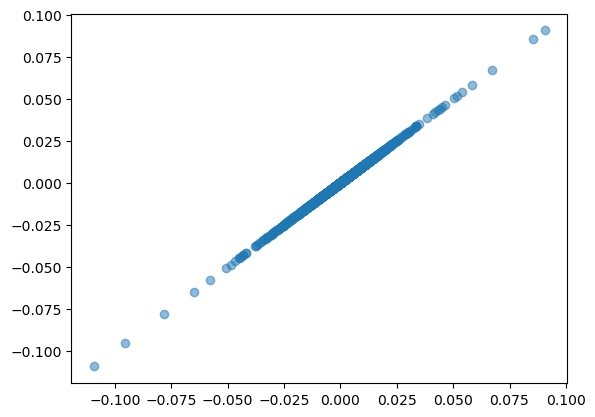

In [13]:
#For reference, 100% correlation looks like this

plt.scatter(sp500["Daily Returns"], sp500['Daily Returns'], alpha = 0.5)

#More linearly alligned plots means greater beta between the two 

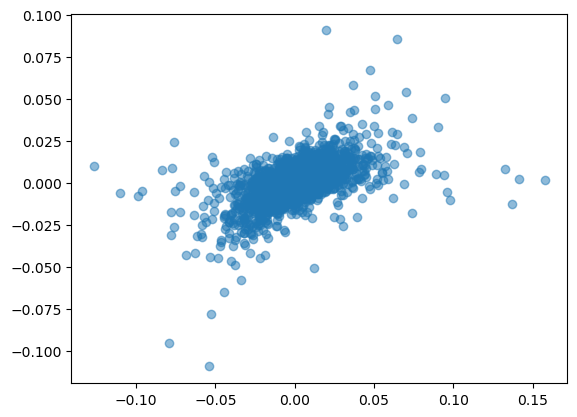

In [14]:
plt.scatter(amzn['Daily Returns'], sp500['Daily Returns'], alpha = 0.5)

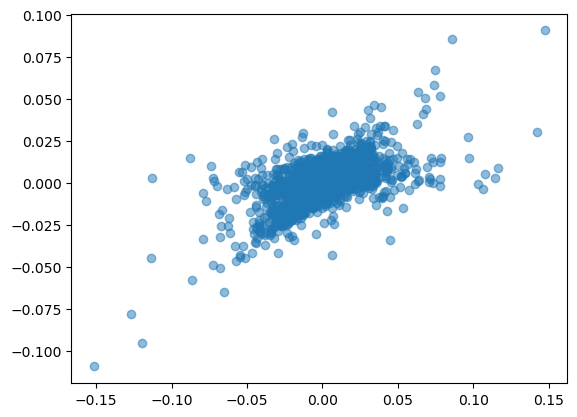

In [15]:
plt.scatter(ge['Daily Returns'], sp500['Daily Returns'], alpha = 0.5)

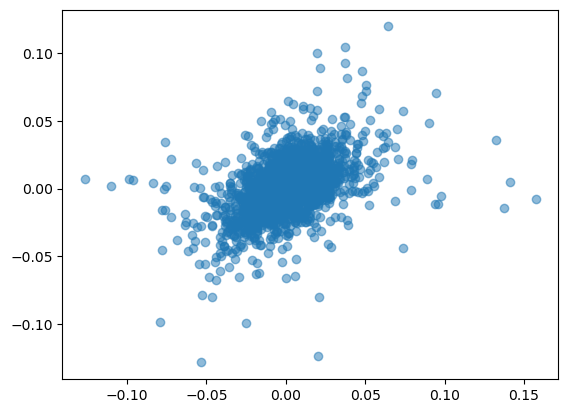

In [16]:
plt.scatter(amzn['Daily Returns'], aapl['Daily Returns'], alpha = 0.5)

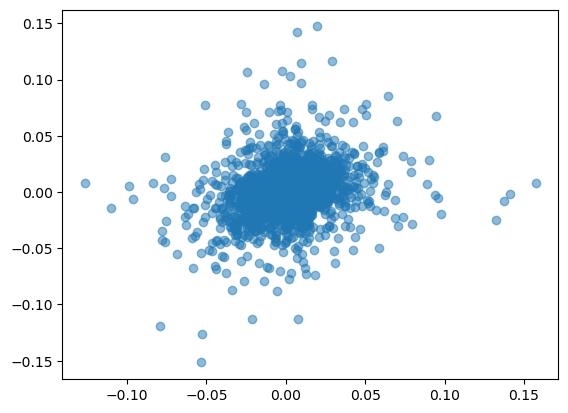

In [17]:
plt.scatter(amzn['Daily Returns'], ge['Daily Returns'], alpha = 0.5)

# Linear Regression

In [18]:
from scipy.stats import linregress

In [20]:
sp500 = sp500.dropna()
amzn = amzn.dropna()
aapl = aapl.dropna()
ge = ge.dropna()

In [27]:
def beta_and_alpha(df):
    
    beta,alpha,_,_,_ = linregress(sp500['Daily Returns'], df['Daily Returns'])
    #This returns the beta and alpha of sp500 with whatever df is passed
    
    return beta,alpha

In [28]:
beta_and_alpha(sp500)

(1.0, 0.0)

In [32]:
beta_and_alpha(aapl)
#when market moves up by 1%, apple moves up by 1.09%(beta)

(1.0917032604626986, 0.00056985495810669)

In [33]:
beta_and_alpha(amzn)

(1.0264747996224106, 0.0006735393441121332)

In [35]:
beta_and_alpha(ge)
#Even when market moves up, ge tends to move down(alpha)

(1.1488219188566975, -0.00043588058002061957)

In [38]:
#Ability to have leverage etf - leverage etf borrow money to increase returns

sp_lev_ETF = pd.read_csv("/Users/pratyush/Python/Python for Finance and Algorithmic Trading/Python-Finance-QuantConnect (1)/06-Financial-Concepts-with-Python/sp_leveraged_2010.csv",index_col='Date',parse_dates=True)

In [40]:
sp_lev_ETF

#SP ETF is borrowing a dollar for every dollar it has in its capital
        #This way, the ETF in theory should be able to double returns

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,9.787500,9.787500,9.552500,9.560000,9.009787,33780400
2010-01-04,9.715000,9.887500,9.715000,9.867500,9.299584,43924400
2010-01-05,9.867500,9.937500,9.780000,9.932500,9.360847,38780400
2010-01-06,9.910000,9.990000,9.892500,9.940000,9.367911,42499600
2010-01-07,9.907500,10.047500,9.850000,10.022500,9.445668,45704800
...,...,...,...,...,...,...
2021-08-30,131.880005,133.119995,131.750000,132.619995,132.619995,1258900
2021-08-31,132.550003,132.779999,131.869995,132.309998,132.309998,1763600
2021-09-01,132.809998,133.139999,132.229996,132.380005,132.380005,1402900


In [41]:
sp_lev_ETF = calculate_cumulative_percent(sp_lev_ETF)

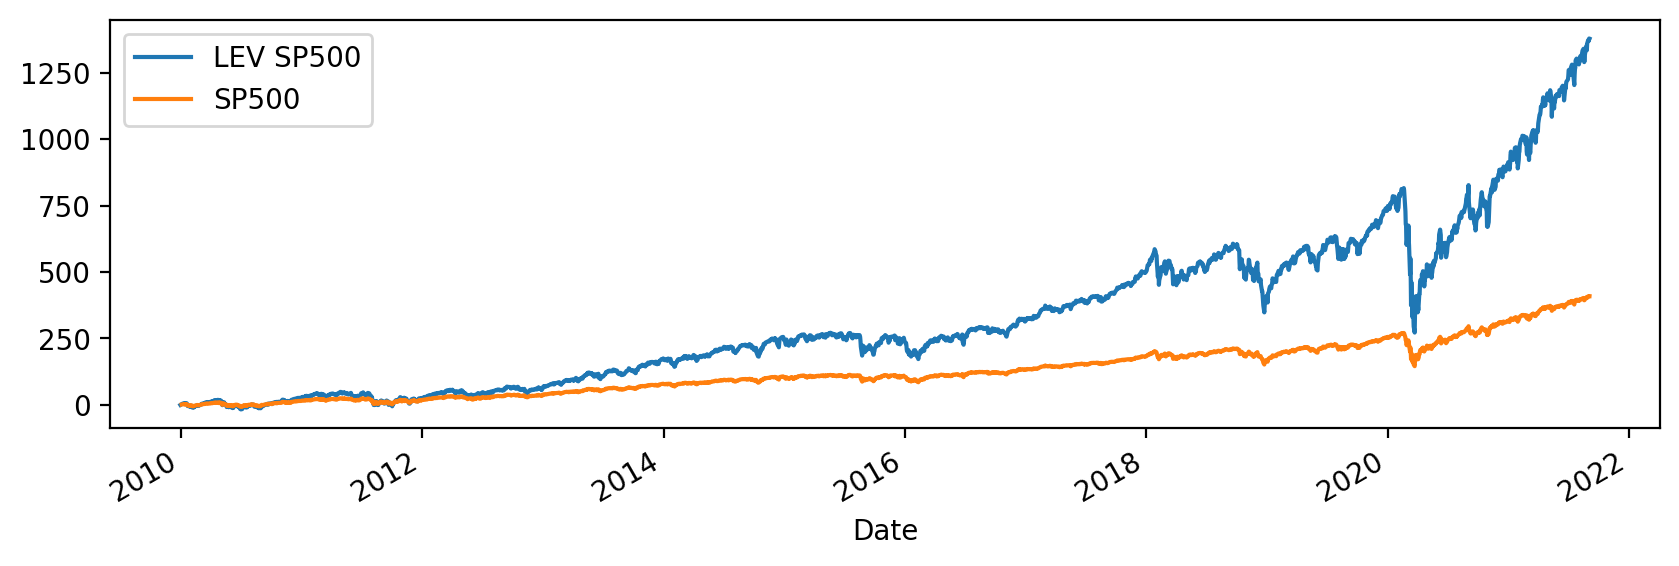

In [44]:
plt.figure(figsize = (10,3), dpi = 200)
sp_lev_ETF['Percent Change'].plot(label = 'LEV SP500')
sp500['Percent Change'].plot(label = 'SP500')
plt.legend()

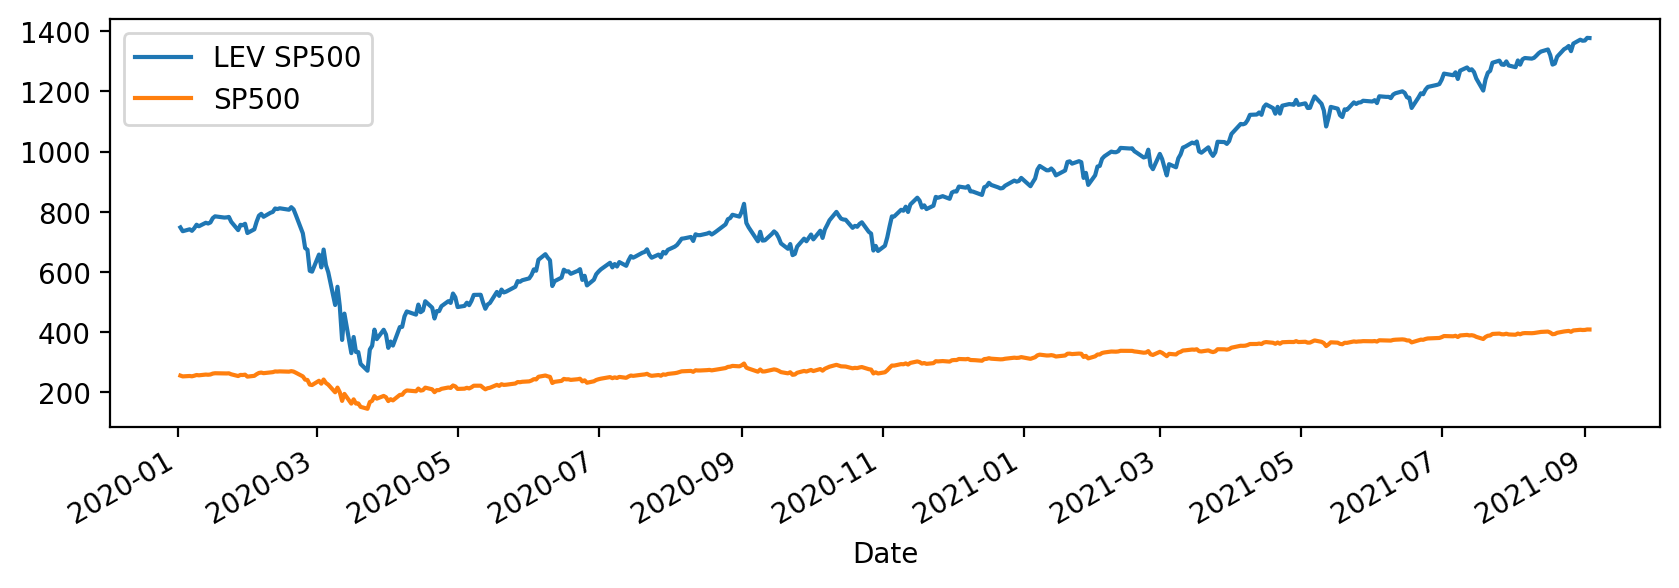

In [45]:
plt.figure(figsize = (10,3), dpi = 200)
sp_lev_ETF['Percent Change']['2020':'2021'].plot(label = 'LEV SP500')
sp500['Percent Change']['2020':'2021'].plot(label = 'SP500')
plt.legend()

In [46]:
sp_lev_ETF['Daily Returns'] = sp_lev_ETF['Adj Close'].pct_change(1)
sp_lev_ETF = sp_lev_ETF.dropna()

In [47]:
beta_and_alpha(sp_lev_ETF)

(2.0101356182990884, -7.749523800499236e-05)